In [1]:
import os
import cv2
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf
import sys
sys.path.append("..")

from utils import label_map_util
from utils import visualization_utils as vis_util

In [150]:
MODEL_NAME = 'Train_model_two/inference_graph'
IMAGE_DIR = 'test_images'
IMAGE_NAME = '250.jpg'

In [151]:
CWD_PATH = os.getcwd()

PATH_TO_CKPT = os.path.join(CWD_PATH,MODEL_NAME,'frozen_inference_graph.pb')

PATH_TO_LABELS = os.path.join(CWD_PATH,'Train_model_two/training','labelmap.pbtxt')

PATH_TO_IMAGE = os.path.join(CWD_PATH,IMAGE_DIR,IMAGE_NAME)

In [106]:
# Number of classes the object detector can identify
NUM_CLASSES = 15

In [107]:
# network predicts 5, we know that this corresponds to "Leaf_folder"
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)


In [108]:
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

    sess = tf.Session(graph=detection_graph)

In [109]:
image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')

detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')

detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')

num_detections = detection_graph.get_tensor_by_name('num_detections:0')

In [152]:
image = cv2.imread(PATH_TO_IMAGE)
image_expanded = np.expand_dims(image, axis=0)

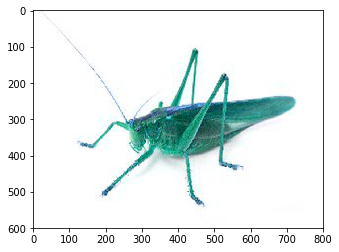

In [153]:
real_image = image.copy()
plt.imshow(real_image)

In [154]:
(boxes, scores, classes, num) = sess.run(
    [detection_boxes, detection_scores, detection_classes, num_detections],
    feed_dict={image_tensor: image_expanded})

vis_util.visualize_boxes_and_labels_on_image_array(
    image,
    np.squeeze(boxes),
    np.squeeze(classes).astype(np.int32),
    np.squeeze(scores),
    category_index,
    use_normalized_coordinates=True,
    line_thickness=8,
    min_score_thresh=0.50)

cv2.namedWindow('Object detector', cv2.WINDOW_NORMAL)
cv2.resizeWindow('Object detector', 800,400)
output = np.hstack((real_image,image))
cv2.imwrite('result/'+ IMAGE_NAME,output)
cv2.imshow('Object detector', output)

cv2.waitKey(0)
cv2.destroyAllWindows()